# This notebook is for the main exploration of our Telco Churn data

In [1]:
from env import get_db_url
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
# acquiring the needed dataset using a function from the acquire file

telco_churn = acquire.get_telco_data()

In [3]:
df = telco_churn
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [4]:
# this function from our prepare file is used to prep our dataframe
df = prepare.prep_telco_data(df)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [5]:
df = df.rename(columns = {"contract_type_Two year":"contract_type_Two_year", "contract_type_One year": "contract_type_one_year"})

In [6]:
df= df.drop(columns= ['gender', 'dependents', 'phone_service', 'multiple_lines', 'online_backup', 'partner', 'paperless_billing', 'streaming_movies', 'internet_service_type', 'payment_type', 'customer_id', 'streaming_tv', 'device_protection', 'tech_support', 'online_security'])

In [7]:
df.dropna()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.3,No,One year,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.4,No,Month-to-month,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.4,Yes,Month-to-month,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.9,No,One year,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.7,Yes,Month-to-month,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1


In [8]:
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.3,No,One year,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.4,No,Month-to-month,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.4,Yes,Month-to-month,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.9,No,One year,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.7,Yes,Month-to-month,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1


In [9]:
train, val, test= prepare.split_data(df, 'churn')
train.shape, val.shape, test.shape

((3943, 33), (1691, 33), (1409, 33))

In [10]:
train.dtypes

senior_citizen                             int64
tenure                                     int64
monthly_charges                          float64
total_charges                             object
churn                                     object
contract_type                             object
gender_encoded                             int64
partner_encoded                            int64
dependents_encoded                         int64
phone_service_encoded                      int64
paperless_billing_encoded                  int64
churn_encoded                              int64
multiple_lines_No phone service            uint8
multiple_lines_Yes                         uint8
online_security_No internet service        uint8
online_security_Yes                        uint8
online_backup_No internet service          uint8
online_backup_Yes                          uint8
device_protection_No internet service      uint8
device_protection_Yes                      uint8
tech_support_No inte

# Are senior citizen more likely to churn?

- H_0: The mean of senior citizens who churn is <= the mean of those who are not senior citizens 

- H_a: The mean of senior citizens who churn is > the mean of those who are not senior citizens 

In [11]:
# this uses bolean masking to return customers who are senior citizens, and shows if they have churned
is_senior_citizen = train[train.senior_citizen == 1].churn_encoded 
is_senior_citizen

6832    0
3404    0
5279    0
3094    1
20      0
       ..
4543    1
2511    0
1013    0
4295    0
681     0
Name: churn_encoded, Length: 623, dtype: int64

Text(0, 0.5, 'Total')

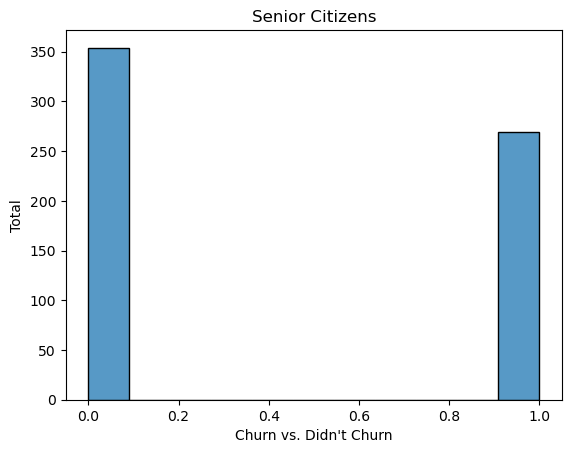

In [12]:
# histplot showing senior citizens who have or have not churned
sns.histplot(data = is_senior_citizen)
plt.title('Senior Citizens')
plt.xlabel("Churn vs. Didn't Churn")
plt.ylabel('Total')

In [13]:
# this filters our dataframe for customers who are not senior citizens, and shows if they have churned or not
is_not_senior_citizen = train[train.senior_citizen == 0].churn_encoded 
is_not_senior_citizen

433     0
25      1
3196    0
4466    0
6030    0
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 3320, dtype: int64

Text(0, 0.5, 'Total')

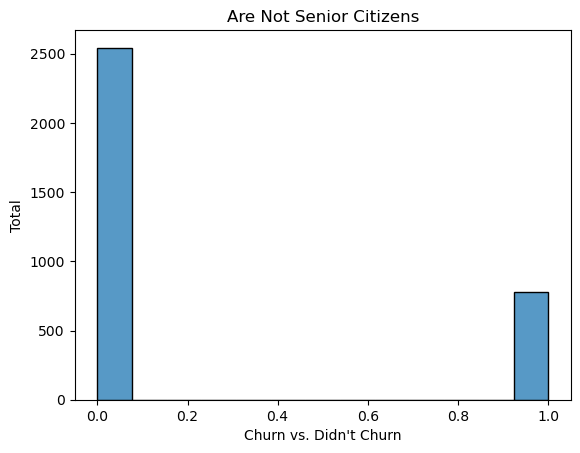

In [14]:
# histplot of non senior citizen customers who have churned or have not churned
sns.histplot(data= is_not_senior_citizen)
plt.title('Are Not Senior Citizens')
plt.xlabel("Churn vs. Didn't Churn")
plt.ylabel('Total')

In [15]:
alpha = 0.05

In [16]:
# this returns our variance for both groups and shows that they are not equal
print(is_senior_citizen.var())
print(is_not_senior_citizen.var())

0.24574071111157159
0.17931723882574066


Text(0, 0.5, 'Total')

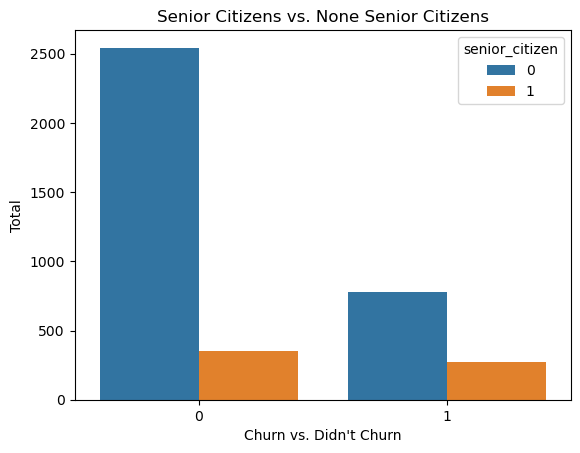

In [17]:
sns.countplot(data= train, x= 'churn_encoded', hue= 'senior_citizen')
plt.title('Senior Citizens vs. None Senior Citizens')
plt.xlabel("Churn vs. Didn't Churn")
plt.ylabel('Total')

In [18]:
observed = pd.crosstab(train.senior_citizen, train.churn)
observed


churn,No,Yes
senior_citizen,,
0,2543,777
1,354,269


In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [20]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')


Observed Values

[[2543  777]
 [ 354  269]]
---
Expected Values

[[2439  880]
 [ 457  165]]
---

chi^2 = 104.2292
p     = 0.0000


# Takeaways
- With the available data, and using the contingency tables, we are able to see that there is a significant 
   relationship between being a senior citizen and churn. This is further shown with our barplot.

-----

# Mean monthly charges of churned customers is higher than the overall average

In [21]:
train

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,1,61,99.00,5969.3,No,One year,0,1,1,1,...,1,0,1,1,0,1,0,0,1,0
433,0,40,70.75,2921.75,No,One year,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
25,0,1,30.50,30.5,Yes,Month-to-month,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,13,49.15,649.4,No,Month-to-month,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4466,0,70,110.50,7752.05,No,Two year,1,1,0,1,...,1,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0,10,88.85,929.45,No,Month-to-month,1,1,1,1,...,1,0,1,0,0,1,0,0,1,0
6933,0,3,78.50,242.05,Yes,Month-to-month,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2194,0,6,49.15,270.8,Yes,Month-to-month,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5309,0,64,24.05,1559.15,No,Two year,1,1,1,1,...,0,1,0,0,1,0,1,0,0,1


<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

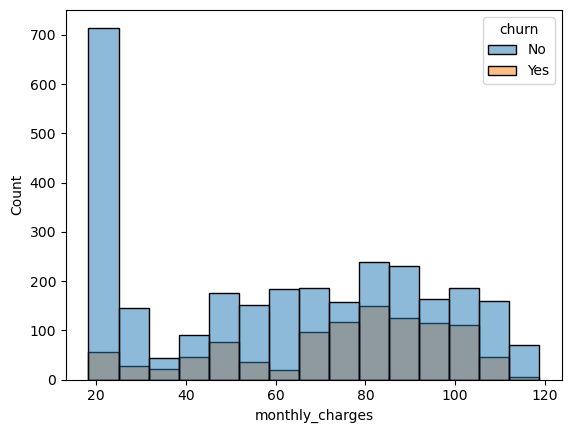

In [22]:
sns.histplot(data= train, x= 'monthly_charges', hue= 'churn')

In [23]:
overall_mean = train.monthly_charges.mean()
overall_mean

64.60090032969808

In [24]:
did_churn = train[train.churn == 'Yes']
did_churn1 = did_churn.churn_encoded
did_churn1

25      1
1528    1
5615    1
2912    1
5146    1
       ..
4543    1
6743    1
1695    1
6933    1
2194    1
Name: churn_encoded, Length: 1046, dtype: int64

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

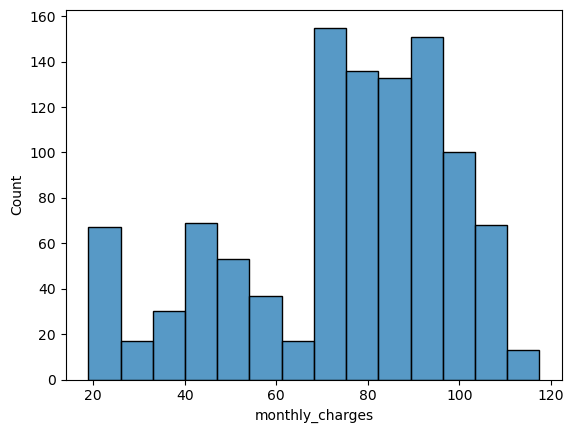

In [25]:
sns.histplot(data= did_churn, x= 'monthly_charges')

In [26]:
churn_mean = train.monthly_charges.mean()
churn_mean

64.60090032969808

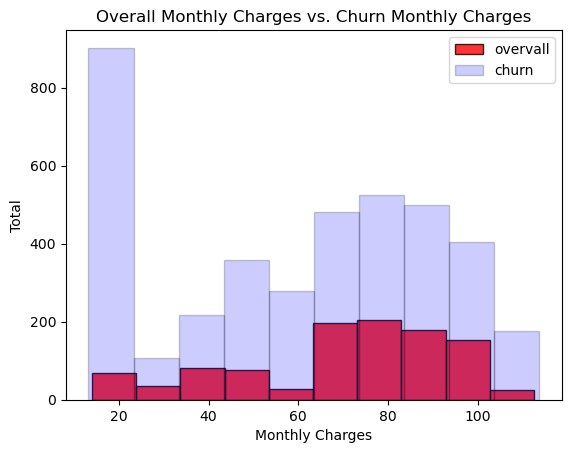

In [27]:
plt.hist(data= did_churn, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.8, color='red', label= 'overvall')
plt.hist(data= train, x= 'monthly_charges', align='left', edgecolor='black', alpha=0.2, color='blue', label= 'churn')
plt.legend()
plt.title('Overall Monthly Charges vs. Churn Monthly Charges')
plt.xlabel("Monthly Charges")
plt.ylabel('Total')
plt.show()

In [28]:
alpha= 0.05

In [29]:
train.churn.value_counts()

No     2897
Yes    1046
Name: churn, dtype: int64

In [30]:
train.dropna()
val.dropna()
test.dropna()
did_churn.dropna()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
25,0,1,30.50,30.5,Yes,Month-to-month,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1528,0,4,50.85,239.55,Yes,Month-to-month,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5615,0,1,69.40,69.4,Yes,Month-to-month,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2912,0,52,85.35,4338.6,Yes,Month-to-month,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5146,0,1,25.30,25.3,Yes,Month-to-month,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1,25,102.80,2660.2,Yes,Month-to-month,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
6743,0,30,94.40,2838.7,Yes,Month-to-month,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
1695,0,6,91.00,531,Yes,Month-to-month,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
6933,0,3,78.50,242.05,Yes,Month-to-month,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [31]:
t, p = stats.ttest_1samp(did_churn.monthly_charges, overall_mean)

print('t value:', t,) 
print('p value:',  p/2, alpha)



t value: 13.387078523200328
p value: 3.880872809405724e-38 0.05


In [32]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


#  Do month-to-month customers churn more than the rest?

In [33]:
train.T

,6832,433,25,3196,4466,6030,4142,1528,5615,3971,...,1013,4295,6743,681,1695,1821,6933,2194,5309,2320
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
tenure,61,40,1,13,70,8,49,4,1,24,...,8,69,30,56,6,10,3,6,64,3
monthly_charges,99.0,70.75,30.5,49.15,110.5,73.5,106.65,50.85,69.4,83.15,...,64.4,105.4,94.4,94.8,91.0,88.85,78.5,49.15,24.05,92.0
total_charges,5969.3,2921.75,30.5,649.4,7752.05,632.2,5174.35,239.55,69.4,2033.05,...,581.7,6998.95,2838.7,5264.3,531,929.45,242.05,270.8,1559.15,266.8
churn,No,No,Yes,No,No,No,No,Yes,Yes,No,...,No,No,Yes,No,Yes,No,Yes,Yes,No,No
contract_type,One year,One year,Month-to-month,Month-to-month,Two year,Month-to-month,Two year,Month-to-month,Month-to-month,One year,...,Month-to-month,Two year,Month-to-month,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Two year,Month-to-month
gender_encoded,0,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,1,1,0
partner_encoded,1,1,1,0,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,0
dependents_encoded,1,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
phone_service_encoded,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
one_year= train[train.contract_type == 'One year']
one_year

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_one_year,contract_type_Two_year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6832,1,61,99.00,5969.3,No,One year,0,1,1,1,...,1,0,1,1,0,1,0,0,1,0
433,0,40,70.75,2921.75,No,One year,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3971,0,24,83.15,2033.05,No,One year,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
3173,0,52,57.95,3042.25,No,One year,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3404,1,66,110.60,7210.85,No,One year,1,1,1,1,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,0,48,82.05,4029.95,Yes,One year,1,1,1,1,...,0,0,1,1,0,1,0,0,0,1
496,1,55,100.00,5509.3,Yes,One year,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
3245,0,55,19.50,1026.35,No,One year,0,1,1,1,...,0,1,0,1,0,0,1,0,0,1
109,1,58,105.50,6205.5,Yes,One year,1,1,0,1,...,1,0,1,1,0,1,0,1,0,0


<AxesSubplot:xlabel='churn', ylabel='Count'>

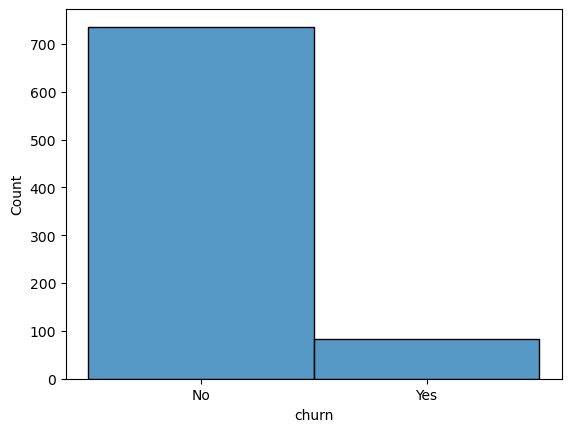

In [35]:
sns.histplot(data= one_year, x= 'churn')

<AxesSubplot:xlabel='churn', ylabel='Count'>

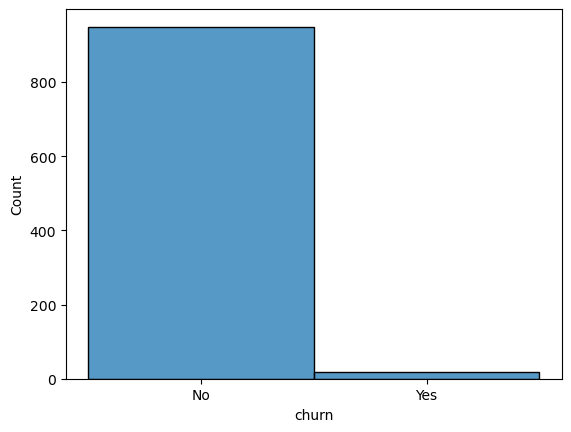

In [36]:
two_year= train[train.contract_type == 'Two year']

sns.histplot(data= two_year, x= 'churn')

<AxesSubplot:xlabel='churn', ylabel='Count'>

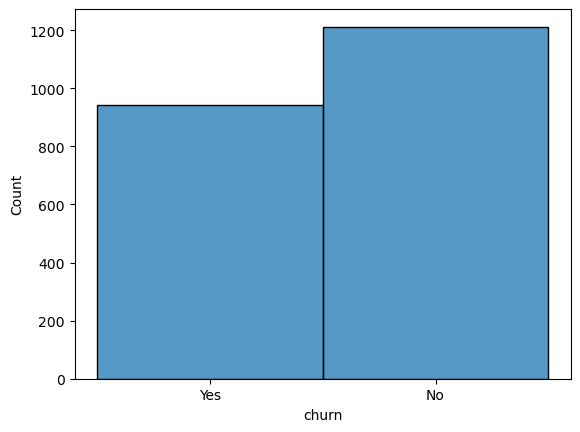

In [37]:
month_contract= train[train.contract_type == 'Month-to-month']

sns.histplot(data= month_contract, x= 'churn')

<AxesSubplot:xlabel='contract_type', ylabel='Count'>

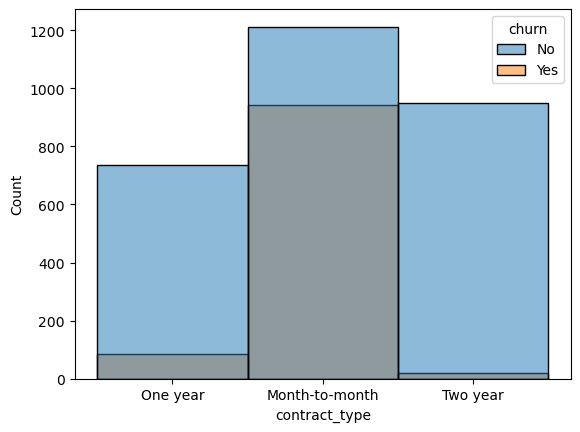

In [38]:
sns.histplot(data= train, x= 'contract_type', hue= 'churn')

Text(0.5, 1.0, 'Churns Per Contract Type')

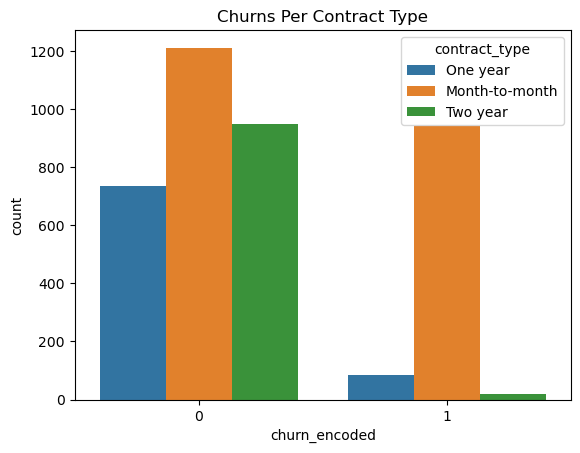

In [39]:
sns.countplot(data= train, x= 'churn_encoded', hue= 'contract_type')
plt.title('Churns Per Contract Type')

In [40]:
observed_2= pd.crosstab(train.contract_type, df.churn)

<AxesSubplot:xlabel='contract_type'>

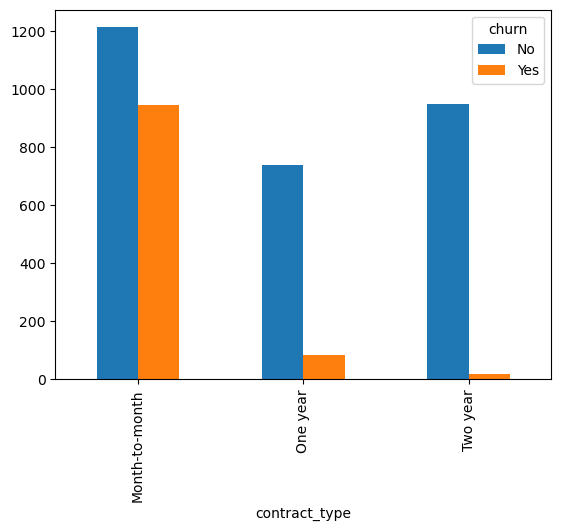

In [41]:
observed_2.plot.bar()

In [42]:
observed_contract=pd.crosstab(train['contract_type'], train.churn)
observed_contract

churn,No,Yes
contract_type,,
Month-to-month,1212,943
One year,736,84
Two year,949,19


H_0: The mean of churn is the same between each contract type

H_a: The mean of churn is differnt between each contract type

-----

# Do customers who have device protection churn more than customes without online protection?
 

In [43]:
no_Protection= train[train.device_protection_Yes == 1]
print(no_Protection.churn_encoded)



3196    0
4466    0
4142    0
3971    0
3173    0
       ..
1921    0
6965    0
3306    0
1013    0
1695    1
Name: churn_encoded, Length: 1351, dtype: int64


<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

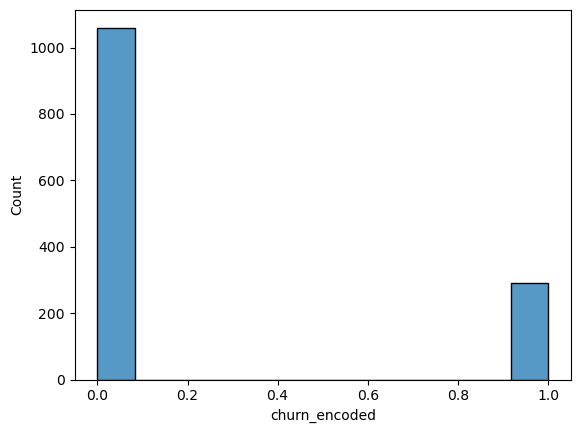

In [44]:
sns.histplot(data= no_Protection, x= 'churn_encoded')

In [45]:
yes_Protection= train[train.device_protection_Yes == 0]
yes_Protection.churn_encoded

6832    0
433     0
25      1
6030    0
1528    1
       ..
1821    0
6933    1
2194    1
5309    0
2320    0
Name: churn_encoded, Length: 2592, dtype: int64

<AxesSubplot:xlabel='churn_encoded', ylabel='Count'>

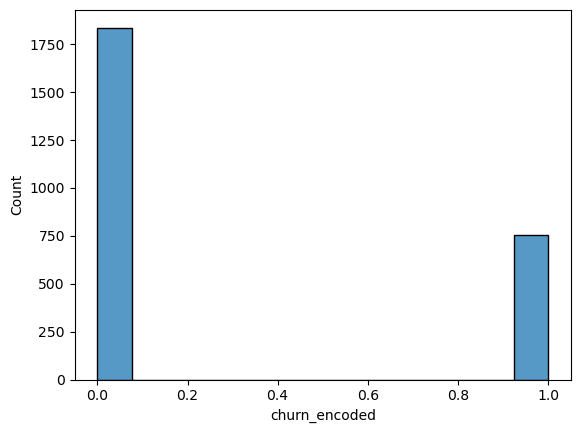

In [46]:
sns.histplot(data= yes_Protection, x= 'churn_encoded')

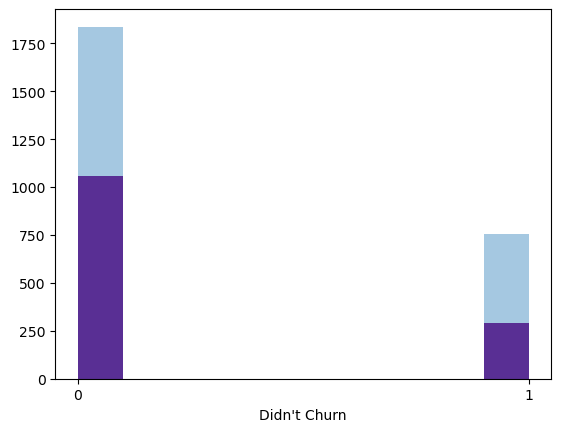

In [47]:
plt.hist(data= no_Protection, x= 'churn_encoded', color= 'purple')
plt.hist(data= yes_Protection, x= 'churn_encoded', alpha= .4)
plt.xticks(range(2))
plt.xlabel("Didn't Churn")
plt.show()


-----

# Modeling 

- ###  Decision Tree

In [48]:
train= train.drop(columns= ['churn', 'contract_type'])

In [49]:
train= train.drop(columns= ['total_charges'])

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 6832 to 2320
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3943 non-null   int64  
 1   tenure                                 3943 non-null   int64  
 2   monthly_charges                        3943 non-null   float64
 3   gender_encoded                         3943 non-null   int64  
 4   partner_encoded                        3943 non-null   int64  
 5   dependents_encoded                     3943 non-null   int64  
 6   phone_service_encoded                  3943 non-null   int64  
 7   paperless_billing_encoded              3943 non-null   int64  
 8   churn_encoded                          3943 non-null   int64  
 9   multiple_lines_No phone service        3943 non-null   uint8  
 10  multiple_lines_Yes                     3943 non-null   uint8  
 11  o

In [51]:
train.churn_encoded.value_counts()

0    2897
1    1046
Name: churn_encoded, dtype: int64

In [52]:
baseline=((train.churn_encoded == 0).sum())/len(train.churn_encoded)
baseline * 100

73.47197565305605

In [53]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_val = val.drop(columns=['churn_encoded'])
y_val = val.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [54]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 2148 to 74
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         1691 non-null   int64  
 1   tenure                                 1691 non-null   int64  
 2   monthly_charges                        1691 non-null   float64
 3   total_charges                          1691 non-null   object 
 4   churn                                  1691 non-null   object 
 5   contract_type                          1691 non-null   object 
 6   gender_encoded                         1691 non-null   int64  
 7   partner_encoded                        1691 non-null   int64  
 8   dependents_encoded                     1691 non-null   int64  
 9   phone_service_encoded                  1691 non-null   int64  
 10  paperless_billing_encoded              1691 non-null   int64  
 11  mul

In [55]:
X_train.shape, X_val.shape, X_test.shape

((3943, 29), (1691, 32), (1409, 32))

- ## Decision Tree

In [56]:
tree1 = DecisionTreeClassifier(max_depth=6, random_state=1349)

In [57]:
tree1 = tree1.fit(X_train, y_train)

In [58]:
tree1.classes_.astype(str)

array(['0', '1'], dtype='<U21')

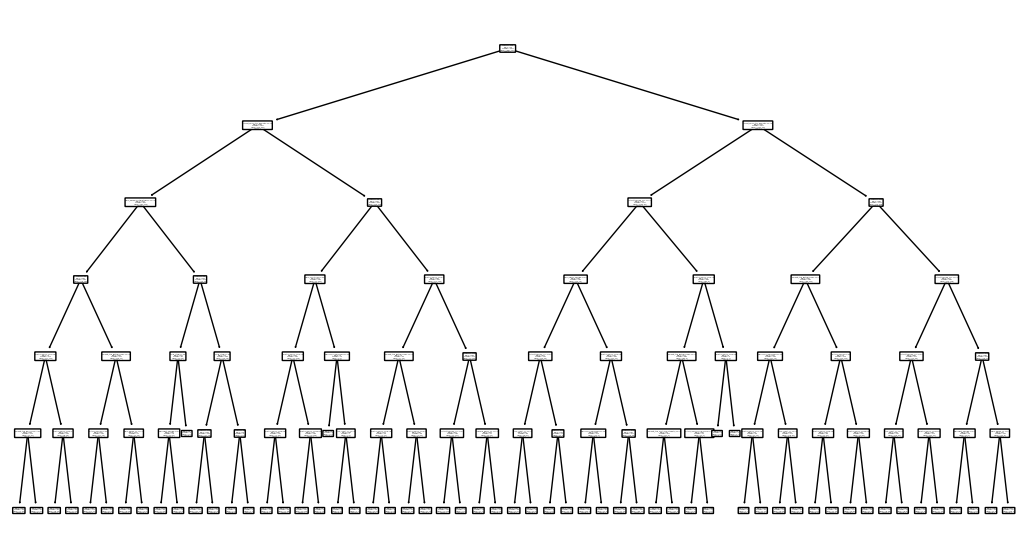

In [59]:
plt.figure(figsize=(13, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=tree1.classes_.astype(str), rounded=True)
plt.show()

In [60]:
# make prediction on train obeservations

y_pred = tree1.predict(X_train)
y_pred


array([0, 0, 1, ..., 0, 0, 1])

In [61]:
y_pred_proba = tree1.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.91262136, 0.08737864],
       [0.92459016, 0.07540984],
       [0.25581395, 0.74418605],
       [0.52830189, 0.47169811],
       [0.98136646, 0.01863354]])

In [62]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.83


In [63]:

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,0,1
0,2706,191
1,481,565


In [64]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.75      0.54      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



- ###  Logistic Regression

In [65]:
logre = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=1349, intercept_scaling=2, solver='lbfgs')


In [66]:
logre.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, intercept_scaling=2,
                   random_state=1349)

In [67]:
print('Coefficient: \n', logre.coef_)
print('Intercept: \n', logre.intercept_)


Coefficient: 
 [[ 0.28892854 -0.03089411  0.04755758  0.06379525 -0.09583521 -0.00899844
  -0.19057259  0.34392782  1.37871627  0.27286671  0.01660143 -0.64019503
   0.01660143 -0.42008407  0.01660143 -0.32544606  0.01660143 -0.2049949
   0.01660143 -0.26909493  0.01660143  0.02868763 -1.11820654 -2.20200372
  -0.33342868  0.01660143  0.64882369  0.85131172  0.24914649]]
Intercept: 
 [1.40953987]


In [68]:
y_pred = logre.predict(X_train)


In [69]:
y_pred_proba = logre.predict_proba(X_train)


In [70]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])


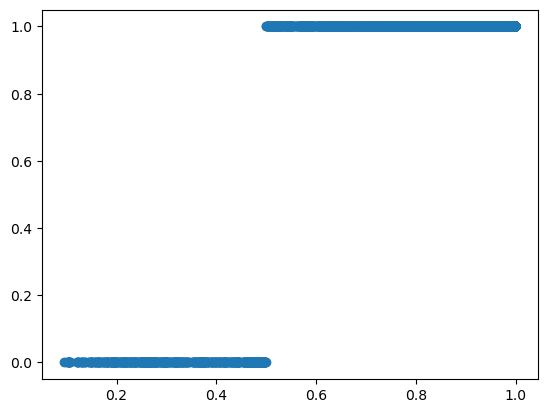

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)


In [72]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logre.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.39


- ### Random Forest

In [73]:
rf1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


In [74]:
rf1.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [75]:
print(rf1.feature_importances_)


[3.37607110e-03 2.30062942e-01 4.69725545e-02 6.10555213e-05
 4.06941300e-03 5.53525991e-03 5.21248908e-04 1.21843356e-02
 1.37228154e-03 1.52340114e-03 2.74381468e-02 3.77440605e-02
 2.07491459e-02 1.91022864e-02 2.84224349e-02 8.26106019e-03
 4.25922063e-02 4.10424267e-02 3.84154029e-02 4.26762356e-04
 1.53242615e-02 1.20108168e-03 3.58871857e-02 1.07365258e-01
 8.43911961e-02 3.69339712e-02 5.79450339e-03 1.41923346e-01
 1.30670073e-03]


In [76]:
X_train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'gender_encoded',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_one_year',
       'contract_type_Two_year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

In [77]:
y_pred = rf1.predict(X_train)

In [78]:
y_pred_proba = rf1.predict_proba(X_train)

In [79]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.79


In [80]:
print(confusion_matrix(y_train, y_pred))


[[2800   97]
 [ 729  317]]


In [81]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2897
           1       0.77      0.30      0.43      1046

    accuracy                           0.79      3943
   macro avg       0.78      0.63      0.65      3943
weighted avg       0.79      0.79      0.76      3943



- ### KNN

In [82]:
# weights = ['uniform', 'density']
knn1 = KNeighborsClassifier(n_neighbors=7, weights='uniform')


In [83]:
knn1.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [84]:
y_pred = knn1.predict(X_train)

In [85]:
y_pred_proba = knn1.predict_proba(X_train)

In [86]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.84


In [87]:
print(confusion_matrix(y_train, y_pred))

[[2658  239]
 [ 405  641]]


In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2897
           1       0.73      0.61      0.67      1046

    accuracy                           0.84      3943
   macro avg       0.80      0.77      0.78      3943
weighted avg       0.83      0.84      0.83      3943



- ### Evaluate Models on Val Dataset

- Decision Tree

In [89]:
X_val= X_val.drop(columns= ['total_charges', 'churn', 'contract_type'])

In [90]:
y_val= y_val.drop(columns= ['total_charges', 'churn', 'contract_type'])

In [91]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree1.score(X_val, y_val)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [92]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = tree1.predict(X_val)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1242
           1       0.61      0.45      0.52       449

    accuracy                           0.78      1691
   macro avg       0.72      0.67      0.69      1691
weighted avg       0.76      0.78      0.77      1691



In [93]:
# make predictions

y_pred = logre.predict(X_val)



print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logre.score(X_val, y_val)))

# confusion matrix of model 1
print(confusion_matrix(y_val, y_pred))

# classification report of model 1
print(classification_report(y_val, y_pred))

print("Model 2: solver = lbfgs, c = .1")



Model 1: solver = lbfgs, c = 1
Accuracy: 0.39
[[ 212 1030]
 [   4  445]]
              precision    recall  f1-score   support

           0       0.98      0.17      0.29      1242
           1       0.30      0.99      0.46       449

    accuracy                           0.39      1691
   macro avg       0.64      0.58      0.38      1691
weighted avg       0.80      0.39      0.34      1691

Model 2: solver = lbfgs, c = .1


- ### Random Forest

In [94]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1.score(X_val, y_val)))


Accuracy of random forest classifier on test set: 0.77


- ### KNN

In [95]:
X_test= X_test.drop(columns= ['churn', 'contract_type', 'total_charges'])

In [96]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn1.score(X_val, y_val)))


Accuracy of KNN classifier on test set: 0.76


- ## Evaluate on Test dataset

- ### Decision Tree

In [99]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree1.score(X_test, y_test)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [101]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = tree1.predict(X_test)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.46      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



- ## Logistect Regression

In [104]:
y_pred = logre.predict(X_test)
y_pred_proba = logre.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logre.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.38
[[162 873]
 [  3 371]]
              precision    recall  f1-score   support

           0       0.98      0.16      0.27      1035
           1       0.30      0.99      0.46       374

    accuracy                           0.38      1409
   macro avg       0.64      0.57      0.36      1409
weighted avg       0.80      0.38      0.32      1409



In [105]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])


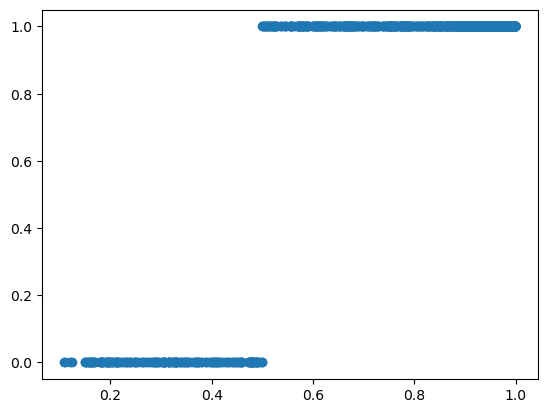

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)


- ### Random Forest

In [108]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1.score(X_test, y_test)))


Accuracy of random forest classifier on test set: 0.76


In [ ]:
- ### KNN